# Capstone Project 2021 DATA 606
## Topic:  Network Intrusion Detection System with Machine Learning Approach
### Student: Edwin Valdez 


**Intruduction**

This project aims to create a Network intrusion Detection System (NIDS) with machine learning capabilities. The system would monitor and detect malicious activity on the network that can lead to future attacks. The system would perform a classification approach with the neural network algorithm that would be able to predict if the network is malicious or normal. NIDS is a solution to the current increasing network attack issues to devices that can further damage a company. Many companies rely on services over the internet with the use of applications and transactions online. Therefore, this model system aims to provide another layer of protection/detection from possible network attacks that can affect those services. 

In [1]:
# Importing Libraries that we are going to use for the implementation of our project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import string

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import seaborn as sns
import glob
import os
from scipy import stats
from scipy.stats import ks_2samp


In [2]:
# Indexes to apply to our dataset since it just contains data
features = ["srcip","sport","dstip","dsport","proto","state","dur","sbytes","dbytes","sttl","dttl","sloss","dloss","service","Sload","Dload","Spkts","Dpkts","swin","dwin","stcpb","dtcpb","smeansz","dmeansz","trans_depth","res_bdy_len","Sjit","Djit","Stime","Ltime","Sintpkt","Dintpkt","tcprtt","synack","ackdat","is_sm_ips_ports","ct_state_ttl","ct_flw_http_mthd","is_ftp_login","ct_ftp_cmd","ct_srv_src","ct_srv_dst","ct_dst_ltm","ct_src_ ltm","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm","attack_cat","Label"]

In [3]:
# NB15_DATA in break down into 4 small datasets since the amount of data is large, here we are exporting each datasets 
NB15_data1 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_1.csv", names=features)
NB15_data2 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_2.csv", names=features)
NB15_data3 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_3.csv", names=features)
NB15_data4 = pd.read_csv("UNSW-NB15CSV Files/UNSW-NB15_4.csv", names=features)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
# having the first look into the data from the network traffic
NB15_data4.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,...,,2,2,7,4,1,1,3,NaN,0
1,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,...,,3,1,4,4,1,1,1,NaN,0
2,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,...,,3,5,2,7,1,1,4,NaN,0
3,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,...,,1,1,4,7,1,1,3,NaN,0
4,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,...,,2,5,2,1,1,1,2,NaN,0


**Information of what each column represent from the dataset (what each index stand for)**
```
No.	Name	Type 	Description
1	srcip	nominal	Source IP address
2	sport	integer	Source port number
3	dstip	nominal	Destination IP address
4	dsport	integer	Destination port number
5	proto	nominal	Transaction protocol
6	state	nominal	Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)
7	dur	Float	Record total duration
8	sbytes	Integer	Source to destination transaction bytes 
9	dbytes	Integer	Destination to source transaction bytes
10	sttl	Integer	Source to destination time to live value 
11	dttl	Integer	Destination to source time to live value
12	sloss	Integer	Source packets retransmitted or dropped 
13	dloss	Integer	Destination packets retransmitted or dropped
14	service	nominal	http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service
15	Sload	Float	Source bits per second
16	Dload	Float	Destination bits per second
17	Spkts	integer	Source to destination packet count 
18	Dpkts	integer	Destination to source packet count
19	swin	integer	Source TCP window advertisement value
20	dwin	integer	Destination TCP window advertisement value
21	stcpb	integer	Source TCP base sequence number
22	dtcpb	integer	Destination TCP base sequence number
23	smeansz	integer	Mean of the ?ow packet size transmitted by the src 
24	dmeansz	integer	Mean of the ?ow packet size transmitted by the dst 
25	trans_depth	integer	Represents the pipelined depth into the connection of http request/response transaction
26	res_bdy_len	integer	Actual uncompressed content size of the data transferred from the server’s http service.
27	Sjit	Float	Source jitter (mSec)
28	Djit	Float	Destination jitter (mSec)
29	Stime	Timestamp	record start time
30	Ltime	Timestamp	record last time
31	Sintpkt	Float	Source interpacket arrival time (mSec)
32	Dintpkt	Float	Destination interpacket arrival time (mSec)
33	tcprtt	Float	TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’.
34	synack	Float	TCP connection setup time, the time between the SYN and the SYN_ACK packets.
35	ackdat	Float	TCP connection setup time, the time between the SYN_ACK and the ACK packets.
36	is_sm_ips_ports	Binary	If source (1) and destination (3)IP addresses equal and port numbers (2)(4)  equal then, this variable takes value 1 else 0
37	ct_state_ttl	Integer	No. for each state (6) according to specific range of values for source/destination time to live (10) (11).
38	ct_flw_http_mthd	Integer	No. of flows that has methods such as Get and Post in http service.
39	is_ftp_login	Binary	If the ftp session is accessed by user and password then 1 else 0. 
40	ct_ftp_cmd	integer	No of flows that has a command in ftp session.
41	ct_srv_src	integer	No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26).
42	ct_srv_dst	integer	No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).
43	ct_dst_ltm	integer	No. of connections of the same destination address (3) in 100 connections according to the last time (26).
44	ct_src_ ltm	integer	No. of connections of the same source address (1) in 100 connections according to the last time (26).
45	ct_src_dport_ltm	integer	No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26).
46	ct_dst_sport_ltm	integer	No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26).
47	ct_dst_src_ltm	integer	No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26).
48	attack_cat	nominal	The name of each attack category. In this data set , nine categories e.g. Fuzzers, Analysis, Backdoors, DoS Exploits, Generic, Reconnaissance, Shellcode and Worms
49	Label	binary	0 for normal and 1 for attack records
```

In [5]:
# showing how much data each csv contain, this more for statistical purpose.
print("This is the shape of NB15_data1: " + str(NB15_data1.shape))
print("This is the shape of NB15_data2: " + str(NB15_data2.shape))
print("This is the shape of NB15_data3: " + str(NB15_data3.shape))
print("This is the shape of NB15_data4: " + str(NB15_data4.shape))

This is the shape of NB15_data1: (700001, 49)
This is the shape of NB15_data2: (700001, 49)
This is the shape of NB15_data3: (700001, 49)
This is the shape of NB15_data4: (440044, 49)


In [6]:
# now we are going to combine all the dataset into one data for our transformation and handle of the information 
combined_datasets = pd.concat([NB15_data1,NB15_data2,NB15_data3,NB15_data4])

In [7]:
combined_datasets.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [8]:
# hear we have the statistical information of the dataset combined.
print("The shape of combined_datasets: " + str(combined_datasets.shape))

The shape of combined_datasets: (2540047, 49)


In [9]:
list(combined_datasets)

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [30]:
# This command show what kind of data we have so far including some format in each column
combined_datasets.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2540047 entries, 0 to 440043
Data columns (total 49 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   srcip             2540047 non-null  object 
 1   sport             2540047 non-null  object 
 2   dstip             2540047 non-null  object 
 3   dsport            2540047 non-null  object 
 4   proto             2540047 non-null  object 
 5   state             2540047 non-null  object 
 6   dur               2540047 non-null  float64
 7   sbytes            2540047 non-null  int64  
 8   dbytes            2540047 non-null  int64  
 9   sttl              2540047 non-null  int64  
 10  dttl              2540047 non-null  int64  
 11  sloss             2540047 non-null  int64  
 12  dloss             2540047 non-null  int64  
 13  service           2540047 non-null  object 
 14  Sload             2540047 non-null  float64
 15  Dload             2540047 non-null  float64
 16  S

In [11]:
# Here we have the distribution between normal and malicious network activity
# 0 = normal , 1 = malicious activity
combined_datasets['Label'].value_counts()

0    2218764
1     321283
Name: Label, dtype: int64

In [12]:
# First look into the attacck category for the malicious activity
# we notice a space before some attack label
combined_datasets['attack_cat'].value_counts()

Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: attack_cat, dtype: int64

In [13]:
# Corrected label count of the attack category.
combined_datasets['attack_cat'] = combined_datasets['attack_cat'].str.strip()
combined_datasets['attack_cat'].value_counts()

Generic           215481
Exploits           44525
Fuzzers            24246
DoS                16353
Reconnaissance     13987
Analysis            2677
Backdoor            1795
Shellcode           1511
Backdoors            534
Worms                174
Name: attack_cat, dtype: int64

<Figure size 432x288 with 0 Axes>

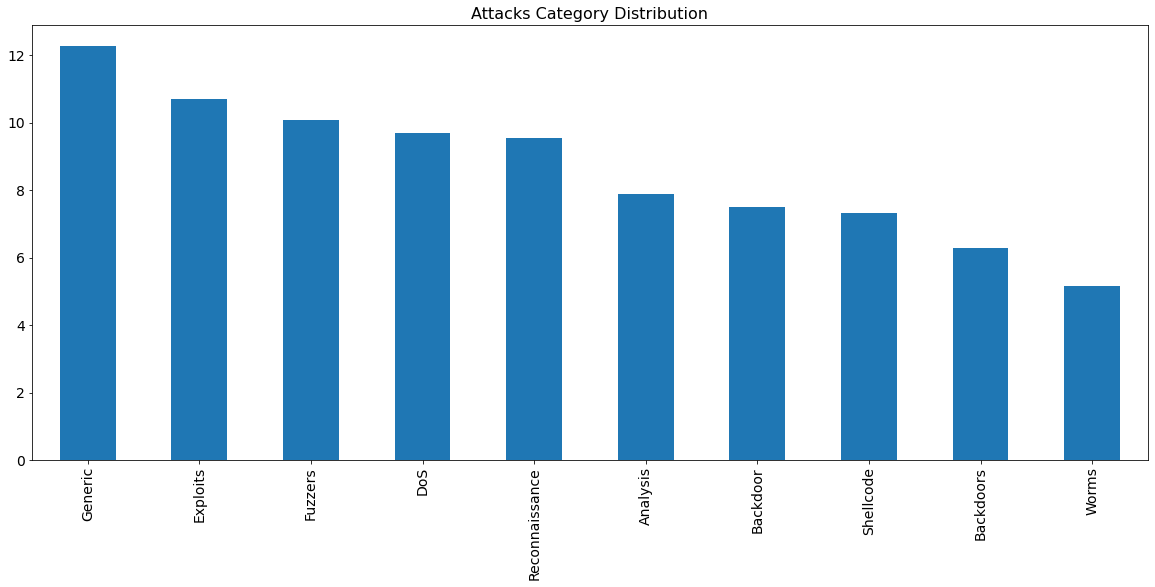

In [14]:
# Distribution grap of the sub-category of attack according to data provided for this project
plt.clf()
plt.figure(figsize=(20,8))
params = {'axes.titlesize':'16','xtick.labelsize':'14','ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Attacks Category Distribution')
combined_datasets['attack_cat'].value_counts().apply(np.log).plot(kind='bar')
plt.show()

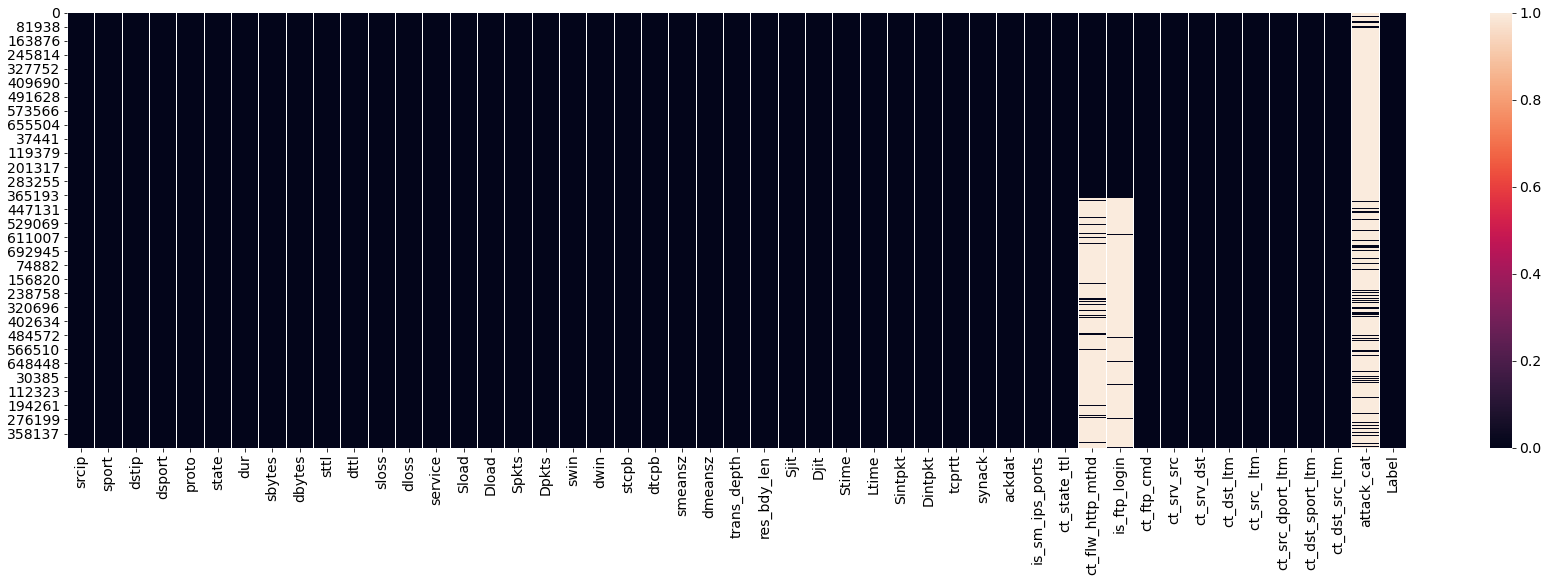

In [15]:
# applying a heat map to see where we have more null value in order to determine if the dataset that we have is good
# to continue of we need to implement some transformation method. 
plt.subplots(figsize=(30,8))
sns.heatmap(combined_datasets.isnull())

In [16]:
# having another view for what elements contains null values for this project
combined_datasets.isnull()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
440040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
440041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
440042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Text(0.5, 1.0, 'Correlation Matrix')

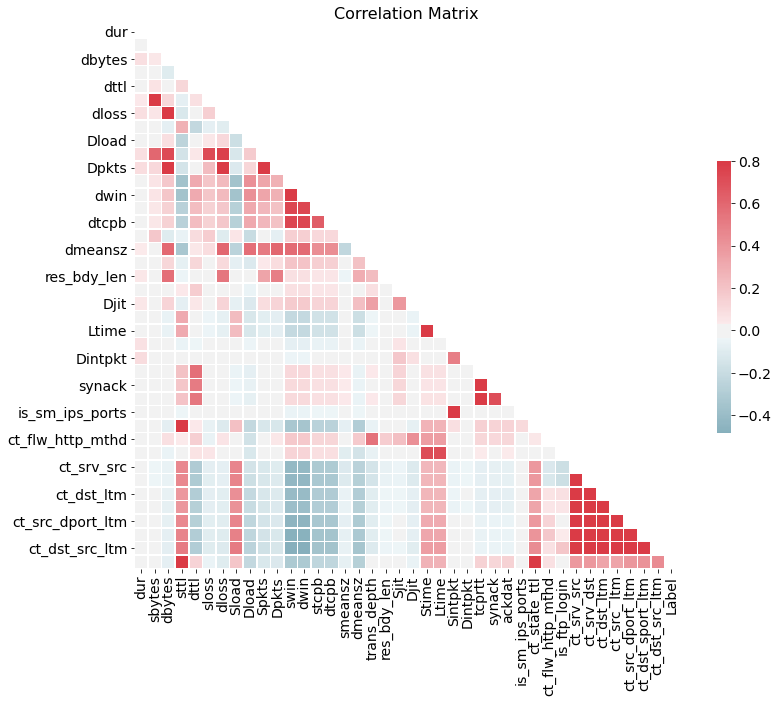

In [17]:
#putting in a different variable the correlation matrix
# checking the correlation value for each variable 
# helps to determine if we have a good data for our neural network model
corr = combined_datasets.corr()
#plotting the correlation matrix
dfMask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(14,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#using sns heatmap for the plotting
sns.heatmap(corr,mask=dfMask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix', fontsize = 16)

In the following graph we are going to take a look on the number of packet they send when a type of network attack happen
We can see the number of send packet between each end point and how this can help us to get some pattern on how each malicious network attacks behave over the network.

                   count       mean         std  min   25%   50%   75%  \
attack_cat                                                               
Analysis          2677.0   5.354875   12.234640  1.0   2.0   2.0  10.0   
Backdoor          1795.0   7.555989   20.376571  1.0   2.0   2.0   4.0   
Backdoors          534.0   4.116105    9.868060  1.0   2.0   2.0   2.0   
DoS              16353.0  24.117348  243.867290  1.0   2.0   2.0  10.0   
Exploits         44525.0  33.962021  277.571151  1.0   2.0  10.0  20.0   
Fuzzers          24246.0  13.764827   34.371893  1.0   2.0  10.0  12.0   
Generic         215481.0   2.453367   16.738999  0.0   2.0   2.0   2.0   
Reconnaissance   13987.0   7.034604   14.853874  1.0   2.0  10.0  10.0   
Shellcode         1511.0   5.964924    3.997610  2.0   2.0   2.0  10.0   
Worms              174.0  18.218391   23.625657  2.0  10.0  10.0  10.0   

                    max  
attack_cat               
Analysis          250.0  
Backdoor          250.0  
Backdoo

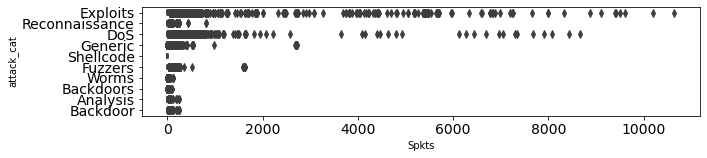

In [26]:
def plot(fn, height, data, label, col, scale='', with_outliers=True, xlim=[], bins=10):
    fig, ax = plt.subplots(figsize=(10, height))

    d = data if with_outliers else remove_outliers(data, col)
    
    if xlim:
        ax.set_xlim(xlim)
    
    if scale:
        ax.set(xscale=scale)
    
    fn(d, label, col, ax, bins)
    plt.show()
def plot_box(data, label, col, scale='', with_outliers=True, xlim=[]):
    plot(lambda d, l, c, ax, b: sns.boxplot(y=l, x=c, data=d, ax=ax, orient='h', width=0.4), 2, data, label, col, scale, with_outliers, xlim)
def plot_stats(data, label, col, no_outliers=False):
    print(data.groupby(label)[col].describe())
    plot_box(data, label, col)
plot_stats(combined_datasets, 'attack_cat', 'Spkts')

                   count       mean         std  min  25%  50%   75%      max
attack_cat                                                                   
Analysis          2677.0   2.123272    3.973535  0.0  0.0  0.0   0.0     24.0
Backdoor          1795.0   1.670195    4.638357  0.0  0.0  0.0   0.0     48.0
Backdoors          534.0   0.749064    3.141555  0.0  0.0  0.0   0.0     46.0
DoS              16353.0  21.252308  311.724743  0.0  0.0  0.0   0.0  11018.0
Exploits         44525.0  23.375856  109.848042  0.0  0.0  8.0  20.0   3698.0
Fuzzers          24246.0   6.095686    8.298022  0.0  0.0  6.0   8.0    436.0
Generic         215481.0   0.937716   32.681832  0.0  0.0  0.0   0.0   6494.0
Reconnaissance   13987.0   4.983771   71.008838  0.0  0.0  2.0   8.0   5254.0
Shellcode         1511.0   3.289212    3.382132  0.0  0.0  0.0   6.0      8.0
Worms              174.0  62.931034  150.181493  0.0  6.0  6.0   8.0    698.0


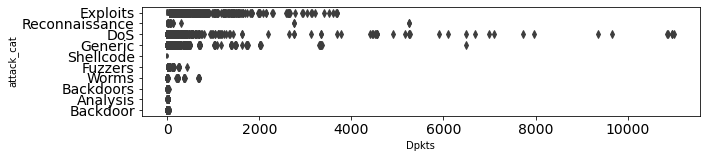

In [28]:
plot_stats(combined_datasets, 'attack_cat', 'Dpkts')